<a href="https://colab.research.google.com/github/Tranminhtuan48/pythonbasics/blob/main/Only%20MNIST_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân Lớp SVM Cho Bộ Dữ Liệu Mnsist

Bộ dữ liệu MNIST phổ biến và xây dựng mô hình SVM để phân loại các chữ số viết tay.. <a href='http://yann.lecun.com/exdb/mnist/'>Thông tin về tập  dữ liệu</a>

# Mục Tiêu
Xây dựng mô hình sử dụng Máy vectơ hỗ trợ để phân loại chính xác các chữ số viết tay từ 0-9 dựa trên các giá trị pixel được cung cấp dưới dạng Features. Như vậy, đây là bài toán 10-class classification.
# Mô Tả Dữ Liệu
Tập dữ liệu được sử dụng là dữ liệu MNIST, một cơ sở dữ liệu lớn về các chữ số viết tay. 'Giá trị pixel' của mỗi chữ số (hình ảnh) bao gồm các đặc điểm và số thực tế trong khoảng 0-9 là nhãn.

Vì mỗi hình ảnh có kích thước 28 x 28 pixel và mỗi pixel tạo thành một đối tượng nên có 784 đối tượng.
<br>

----------
# Mục Lục:
- Tìm hiểu và làm sạch dữ liệu
- Chuẩn bị dữ liệu xây dựng mô hình
- Xây dựng mô hình SVM - điều chỉnh siêu tham số, đánh giá mô hình, v.v.

#### LƯU Ý:
Vì giới hạn hệ thống và kích thước dữ liệu hiện có, để giúp việc phân tích dễ dàng hơn chúng ta sẽ dùng 50% tập dữ liệu có sẵn để xây dựng mô hình.<br>

## Data Understanding and Cleaning

 Tìm hiểu và làm sạch dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [3]:
# Đọc dữ liệu
digits = pd.read_csv("/train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# head
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
four = digits.iloc[2, 1:]
four.shape

(784,)

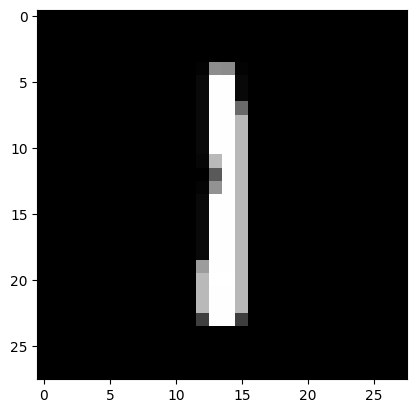

In [6]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

#### Lưu ý: Indexing Recall ####
`list =    [0, 4, 2, 10, 22, 101, 10]` <br>
`indices = [0, 1, 2, 3, ...,        ]` <br>
`reverse = [-n           -3  -2   -1]` <br>

In [7]:
# Bieu Dien Mang
print(four[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   9 254 254   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 106   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6 185 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  89 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4 146 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9 254 254 184   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [8]:
# Tong hop 'label'
digits.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
# Summarise count in terms of percentage
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

Thus, each digit/label has an approximately 9%-11% fraction in the dataset and the **dataset is balanced**. This is an important factor in considering the choices of models to be used, especially SVM, since **SVMs rarely perform well on imbalanced data** (think about why that might be the case).

Let's quickly look at missing values, if any.

In [10]:
# missing values - there are none
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Also, let's look at the average values of each column, since we'll need to do some rescaling in case the ranges vary too much.

In [11]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


You can see that the max value of the mean and maximum values of some features (pixels) is 139, 255 etc., whereas most features lie in much lower ranges  (look at description of pixel 0, pixel 1 etc. above).

Thus, it seems like a good idea to rescale the features.

## Data Preparation cho Xây Dựng Mô Hình

Chuẩn bị tập dữ liệu để xây dựng mô hình. Lưu ý chỉ sử dụng một phần dữ liệu,
để tiết kiệm thời gian

In [12]:
# Tạo Tập train và test
# Phân chia tập dữ liệu (Splitting data)
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Chuẩn hóa đặc trưng
from sklearn.preprocessing import scale
X = scale(X)

# train test split với train_size=10% và test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4200, 784)
(37800, 784)
(4200,)
(37800,)


## Xây Dựng Mô Hình

Xây dựng mô hình và điều chỉnh các tham số.

#1. **Mô hình tuyến tính**.

### Linear SVM

Xây dựng mô hình linear SVM model (Linear kernel).

In [13]:
from sklearn import svm
from sklearn import metrics

# Tạo SVM model với linear kernel
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [14]:
# Dự đoán
test_predictions = svm_linear.predict(x_test)
train_predictions = svm_linear.predict(x_train)
test_predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [16]:
# Đánh giá độ chính xác
# Note: C(i,j) biểu thị số điểm đã biết thuộc lớp i nhưng được dự đoán là vào lớp j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = test_predictions)
confusion

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]])

In [17]:
# Đo độ accuracy
metrics.accuracy_score(y_true=y_test, y_pred=test_predictions)

0.9042592592592592

In [18]:
# Độ chính xác trên lớp
class_wise = metrics.classification_report(y_true=y_test, y_pred=test_predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [19]:
# Sử dụng gc.collect() (garbage collect) để xóa rác giúp SVM chạy mượt hơn
gc.collect()

42

### Non-Linear SVM

Sử dụng non-linear model với RBF kernel.

Radial Basic Function (RBF) kernel hay Gaussian kernel được sử dụng nhiều nhất trong thực tế, và là lựa chọn mặc định trong sklearn.
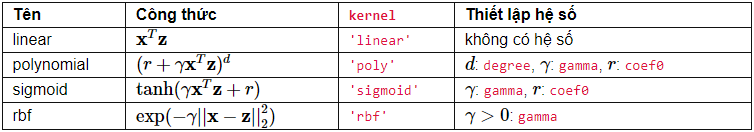

In [20]:
# rbf kernel với tham số (default)
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC()

In [21]:
# Dự đoán
rbf_test_predictions = svm_rbf.predict(x_test)
rbf_train_predictions = svm_rbf.predict(x_train)
# accuracy
print(metrics.accuracy_score(y_true=y_test, y_pred=rbf_test_predictions))

0.9250793650793651


Độ chính xác đạt được với  non-linear kernel cao hơn một chút so với linear kernel. Thực hiện Grid Search Cross-Validation để điều chỉnh các siêu tham số C và gamma.

### Grid Search Cross-Validation

In [32]:
# Grid Search Cross-Validation để tìm ra giá trị tối ưu của C cost và lựa chọn loại kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100],
             'gamma': [1e-2, 1e-3, 1e-4]}

# khởi tạo mô hình
svc_grid_search = svm.SVC(kernel="rbf")

# tạo một bộ classifier để thực hiện Grid Search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True)

# fit
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='accuracy')

In [46]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.610834,0.864604,2.272815,0.344991,1,0.01,"{'C': 1, 'gamma': 0.01}",0.719048,0.759524,0.686905,...,0.725000,0.023450,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.058624,0.155961,1.275219,0.210440,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925000,0.921429,0.908333,...,0.918095,0.006709,3,0.966369,0.969643,0.969345,0.969643,0.967560,0.968512,0.001323
2,2.891074,0.159325,1.781417,0.289779,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.876190,0.884524,0.866667,...,0.876905,0.006547,6,0.900595,0.898512,0.897917,0.900298,0.898214,0.899107,0.001114
3,6.502069,0.670885,1.961253,0.323401,10,0.01,"{'C': 10, 'gamma': 0.01}",0.733333,0.775000,0.709524,...,0.741667,0.021176,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.806435,0.137467,1.208389,0.228092,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941667,0.927381,0.915476,...,0.925238,0.011076,1,0.999107,0.999405,0.999405,0.999702,0.999405,0.999405,0.000188
5,1.483926,0.118434,0.997268,0.024383,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.921429,0.925000,0.900000,...,0.915476,0.009066,4,0.955655,0.960714,0.961310,0.959226,0.958631,0.959107,0.001980
6,6.547363,0.179862,2.469030,0.385481,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733333,0.775000,0.709524,...,0.741667,0.021176,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,1.924383,0.160952,1.208078,0.218045,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938095,0.929762,0.914286,...,0.924048,0.010999,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,1.133281,0.079724,0.935473,0.166510,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.908333,0.920238,0.886905,...,0.905952,0.015040,5,0.997917,0.997321,0.997024,0.998512,0.997917,0.997738,0.000519


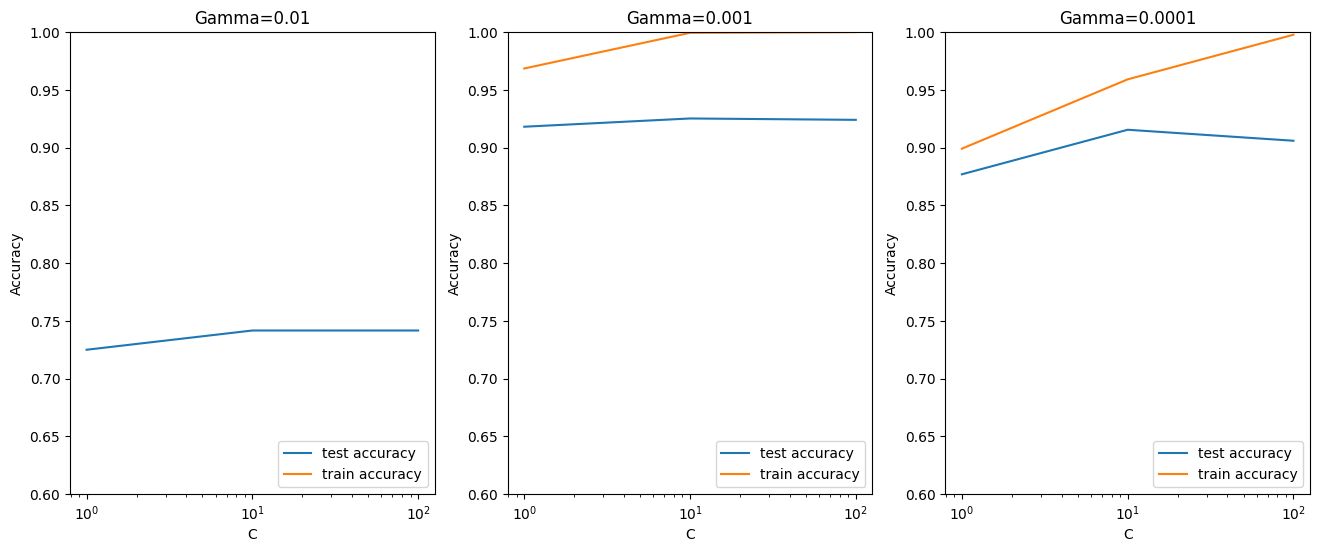

In [47]:
# Chuyển hóa C thàng dạng số để biểu diễn
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

Từ biểu đồ trên, chúng ta có thể quan sát thấy (từ gamma cao hơn đến thấp hơn/từ trái sang phải):
- Ở mức gamma rất cao (0,01), mô hình đạt độ chính xác 100% trên dữ liệu huấn luyện, mặc dù giá trị test khá thấp (<75%). Như vậy, mô hình là quá phù hợp.

- Tại gamma=0,001, giá trị huấn luyện và giá trị test tương đương nhau ở khoảng C=1, mặc dù mô hình bắt đầu quá khớp ở giá trị C cao hơn

- Tại gamma=0,0001, mô hình không quá khớp cho đến C=10 mà bắt đầu có dấu hiệu ở C=100. Ngoài ra, giá trị Train và Test thấp hơn một chút so với gamma=0,001.

Do đó, lựa chọn phù hợp nhất là gamma=0,001 và C=1 (biểu đồ ở giữa), mang lại độ chính xác kiểm tra cao nhất (~92%) trong khi tránh overfiting.

Xây dựng mô hình cuối cùng và xem hiệu suất trên tập test.

### Final model


In [ ]:
# Tối ưu tham số
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=1, gamma=0.001)

In [ ]:
# predict
predictions = svm_final.predict(x_test)

In [ ]:
# evaluation: CM
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)


0.924973544973545 

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


### Kết luận

Độ chính xác cuối cùng trên dữ liệu thử nghiệm là khoảng. 92%. Có thể tăng thêm nếu sử dụng toàn bộ tập dữ liệu (10%)
